In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
saureus = pd.read_csv('./saureus.csv')
df_s = saureus

In [16]:
def model_SAD(I,t,beta,k0,A,alpha):
    Na,Ns,Nd = I
    dNa = beta*Ns+k0*(1-Na/(A-Nd-Ns))*Na
    dNs = -alpha*Ns-beta*Ns
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD(t,beta,k0,A,alpha):
    return odeint(model_SAD,(Na0,Ns0,Nd0),t,args=(beta,k0,A,alpha))
def fit_od(t,beta,k0,A,alpha):
    return np.sum(fit_model_SAD(t,beta,k0,A,alpha),axis=1)
def fit_CFU(t,beta,k0,A,alpha):
    return np.sum(fit_model_SAD(t,beta,k0,A,alpha)[:,0:2],axis=1)
def R_squared(Y,Y_fitted):
    mean = np.mean(Y)
    ss_tot = np.sum((Y - mean) ** 2)
    ss_res = np.sum((Y - Y_fitted) ** 2)
    r_squared = 1 - (ss_res / ss_tot) 
    return np.round(r_squared,3)

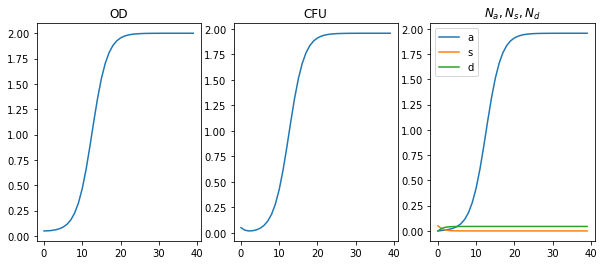

In [80]:
# 文献验证
Na0,Ns0,Nd0 = (0,0.05,0)
alpha = 0.77
beta = 1e-1
A = 2.0
k0 = 0.5
t = np.arange(0,40,1)
t2 = np.arange(0,40,1)
fitted = fit_model_SAD(t,beta,k0,A,alpha)
od = np.sum(fitted,axis=1)
CFU = fit_CFU(t2,beta,k0,A,alpha)
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.title('OD')
plt.plot(t,od)
plt.subplot(132)
plt.title('CFU')
plt.plot(t2,CFU)
plt.subplot(133)
plt.title('$N_a,N_s,N_d$')
fitted = fit_model_SAD(t2,beta,k0,A,alpha)
plt.plot(t2,fitted[:,0],label = 'a')
plt.plot(t2,fitted[:,1],label = 's')
plt.plot(t2,fitted[:,2],label = 'd')
plt.legend()

In [34]:
df_s = pd.read_csv('./sw-mr-1.csv')
df_s_cont = df_s[df_s['treat'] == 0]
time_s = df_s_cont['time']
Na0,Ns0,Nd0 = (0.1,0,0)
popt,pcov = optimize.curve_fit(fit_od,time_s,df_s_cont['od'],p0=(0,0.5,3,0))
fitted_od = fit_od(time_s,*popt)
plt.scatter(time_s,df_s_cont['od'],label = 'ori')
plt.plot(time_s,fitted_od,label = 'SAD')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_s_cont['od'],fitted_od)))
popt,pcov

TypeError: The number of func parameters=4 must not exceed the number of data points=3

(0.7139764410953748, 0.560254183044661)

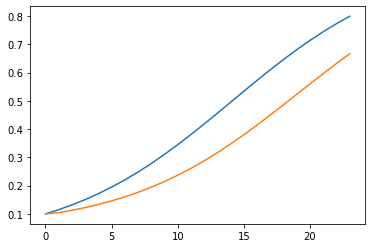

In [109]:
k0 = 0.1556
A = 1
alpha = 1
beta = 1
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
Na0,Ns0,Nd0 = (0,0.1,0)
fitted2 = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted)
plt.plot(t,fitted2)
fitted[20],fitted2[20]

(array([-0.37593226,  3.40981756]), 3)

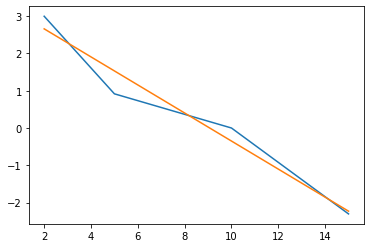

In [116]:
beta_set = np.array([20,2.5,1,0.1])
ag_set = np.array([2,5,10,15])
plt.plot(ag_set,np.log(beta_set))
def line(p):
    k,b = p
    return np.log(beta_set) - k*ag_set-b
fit_line = optimize.leastsq(line,[-1,1])
k,b = fit_line[0]
plt.plot(ag_set,k*ag_set+b)
fit_line

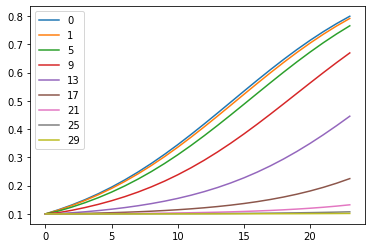

In [119]:
k0 = 0.1556
A = 1
alpha = 1
beta = 0
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,30,4):
    beta = np.e ** (-0.376*ag + 3.41)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag))
plt.legend()

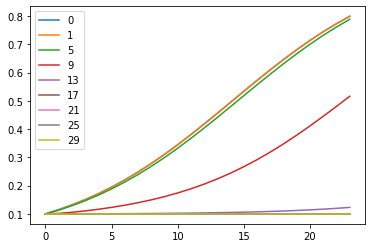

In [121]:
k0 = 0.1556
A = 1
alpha = 1
beta = 0
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,30,4):
    beta = np.e ** (-0.941*ag + 7.4)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag))
plt.legend()